
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

# 📊 Гипотезы о корреляциях в датасете

<ol style="line-height: 1.8;">
  <li>Клиенты, использующие промокоды, чаще получают скидки на свои покупки</li>
   <li> Покупатели, выбирающие размер M, реже оставляют отзывы выше 4</li>
    <li> Покупатели женщины в возрасте 20-30 лет чаще покупают одежду зимой, выбирая размер S</li>
   <li> Скидки чаще применяются при оплате банковской картой</li>
   <li> Средний чек покупки выше зимой, чем весной </li>
   <li>  Пользователи без подписки чаще выбирают наличный расчет, чем с подпиской </li>
  <li>  Покупатели в возрасте до 25 лет чаще оплачивают покупки через мобильные приложения </li>
   <li> Средняя сумма покупки выше у пользователей, которые оставляют положительные оценки ( больше 4 ) </li>
   <li> Покупатели, использующие банковскую карту, совершают больше предыдущих покупок</li>
</ol>


In [16]:
!pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/3c/74/10ea2151b11f8591f82d39c70c1dcc43d0160ba41f8ddb644eb1f5eac348/kagglehub-0.3.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/43.0 kB ? eta -:--:--
   ---------------------------------------- 43.0/43.0 kB 528.6 kB/s eta 0:00:00


In [454]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import kagglehub
# Настройка отображения графиков
%matplotlib inline



In [455]:
# Загружаем данные для задания № 1
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")
print("Path to dataset files:", path)



Path to dataset files: C:\Users\gosha\.cache\kagglehub\datasets\iamsouravbanerjee\customer-shopping-trends-dataset\versions\2


In [456]:
data_file = next(
    (os.path.join(root, file) 
     for root, dirs, files in os.walk(path) 
     for file in files if file.endswith('.csv')), None)
# Проверка и загрузка найденного файла
if data_file:
    try:
        data = pd.read_csv(data_file)
        print("Данные успешно загружены")
    except:
        print("CSV-файл не найден")
df = data.copy() # Создаём копию 



Данные успешно загружены


In [457]:
df.head() # Получаем первые 5 строк датафрейм



,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [458]:
df.info() # Проверяем данные на пропуски



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

В данныз нет пропусков, так как во всех столбцах количество ненулевых значений non-null count совпадает с общим количеством строк 3900

In [459]:
df.describe()



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 1<br>
Клиенты, использующие промокоды, чаще получают скидки на свои покупки
</div>


In [460]:
# Создаем таблицу сопряженности между использованием промокодов и применением скидок
promo_discount_table = pd.crosstab(df['Promo Code Used'], df['Discount Applied'])
print("Таблица сопряженности:")
print(promo_discount_table)



Таблица сопряженности:
Discount Applied    No   Yes
Promo Code Used             
No                2223     0
Yes                  0  1677


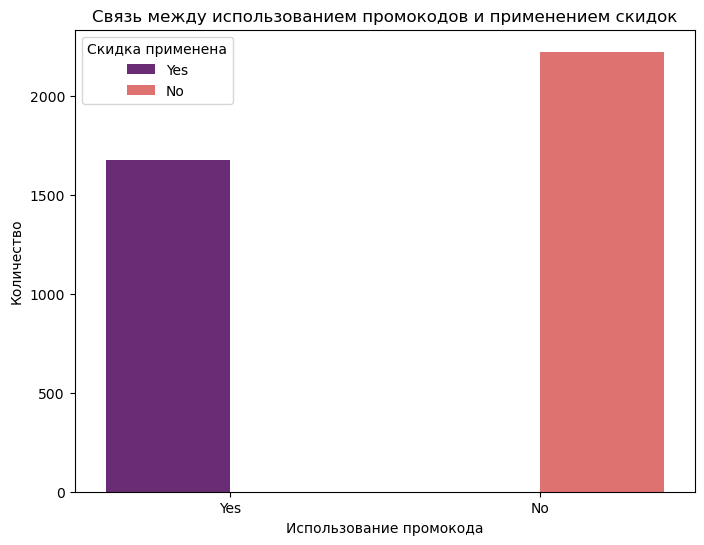

In [462]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.countplot(x='Promo Code Used', hue='Discount Applied', data=df, palette='magma')
plt.title('Связь между использованием промокодов и применением скидок')
plt.xlabel('Использование промокода')
plt.ylabel('Количество')
plt.legend(title='Скидка применена')
plt.show()



Клиенты, которые не используют промокоды, никогда не получают скидки (все 2223 записи имеют значение "No" в столбце Discount Applied)

Клиенты, которые используют промокоды, всегда получают скидки (все 1677 записи имеют значение "Yes" в столбце Discount Applied)

Гипотеза подтверждается: клиенты, использующие промокоды, всегда получают скидки на свои покупки, тогда как те, кто промокоды не использует, никогда их не получают

Перспектива:если скидки важны для привлечения клиентов, можно поощрять их использование промокодов через маркетинговые кампании

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 2<br>
Покупатели, выбирающие размер M, реже оставляют отзывы выше 4
</div>


In [464]:
# Создаем булевый столбец 'Положительный Отзыв' (Review Rating > 4)
df['Положительный Отзыв'] = df['Review Rating'] > 4
# Создаем булевый столбец 'Размер M'
df['Размер M'] = df['Size'] == 'M'
# Создаем таблицу сопряженности
size_reviews  = pd.crosstab(df['Размер M'], df['Положительный Отзыв'])
print("Таблица сопряженности:")
print(size_reviews)



Таблица сопряженности:
Положительный Отзыв  False  True 
Размер M                         
False                 1299    846
True                  1138    617


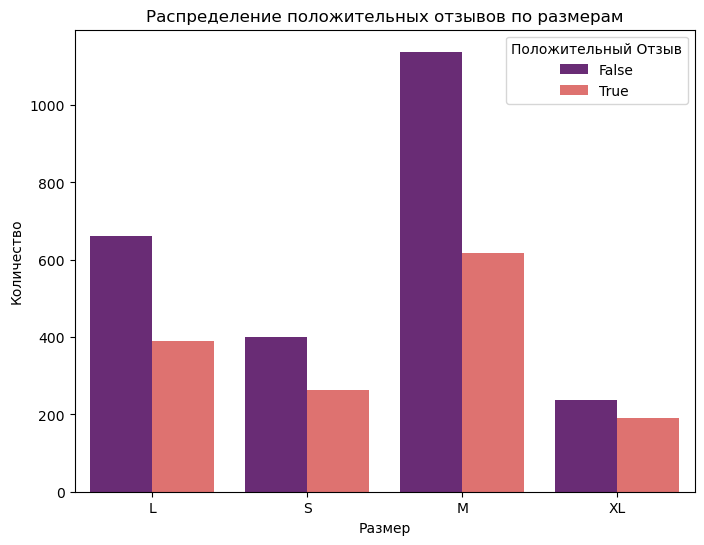

In [465]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.countplot(x='Size', hue='Положительный Отзыв', data=df, palette='magma')
plt.title('Распределение положительных отзывов по размерам')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.legend(title='Положительный Отзыв')
plt.show()



In [466]:
# Расчет пропорций
size_m = df[df['Размер M']]
size_not_m = df[~df['Размер M']]
positive_reviews_m = size_m['Положительный Отзыв'].sum()
total_m = size_m.shape[0]
prop_m = positive_reviews_m / total_m
positive_reviews_not_m = size_not_m['Положительный Отзыв'].sum()
total_not_m = size_not_m.shape[0]
prop_not_m = positive_reviews_not_m / total_not_m

print(f"Доля положительных отзывов для размера M: {prop_m:.4f}")
print(f"Доля положительных отзывов для других размеров: {prop_not_m:.4f}")



Доля положительных отзывов для размера M: 0.3516
Доля положительных отзывов для других размеров: 0.3944


Гипотеза о том, что покупатели, выбирающие размер M, реже оставляют положительные отзывы, подтверждается. Доля положительных отзывов для размера M действительно ниже, чем для других размеров. Это может быть связано с проблемами качества, несоответствием ожиданий покупателей размера M

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 3<br>
Покупатели женщины в возрасте 20-30 лет чаще покупают одежду зимой, выбирая размер S
</div>


In [467]:
# Фильтруем данные для женщин в возрасте от 20 до 30 лет
female_20_30 = df[(df['Gender'] == 'Female') & (df['Age'].between(20, 30))]
# Проверяем, сколько из них покупают одежду зимой, выбирая размер S
condition = (female_20_30['Category'] == 'Clothing') & (female_20_30['Season'] == 'Winter') & (female_20_30['Size'] == 'S')
count = female_20_30[condition].shape[0]
total = female_20_30.shape[0]

print(f"Количество покупательниц, соответствующих условиям: {count}")
print(f"Общее количество покупательниц (женщины 20-30 лет): {total}")



Количество покупательниц, соответствующих условиям: 6
Общее количество покупательниц (женщины 20-30 лет): 248


In [468]:
# Если хотим сравнить с остальными покупательницами
other_female = df[(df['Gender'] == 'Female') & ~df.index.isin(female_20_30.index)]
# Создаем условие для other_female
condition_other = (other_female['Category'] == 'Clothing') & (other_female['Season'] == 'Winter') & (other_female['Size'] == 'S')
# Рассчитываем пропорции
prop_condition = count / total if total > 0 else 0
prop_other = other_female[condition_other].shape[0] / other_female.shape[0] if other_female.shape[0] > 0 else 0

print(f"Доля среди женщин 20-30 лет: {prop_condition:.2f}")
print(f"Доля среди остальных женщин: {prop_other:.2f}")



Доля среди женщин 20-30 лет: 0.02
Доля среди остальных женщин: 0.01


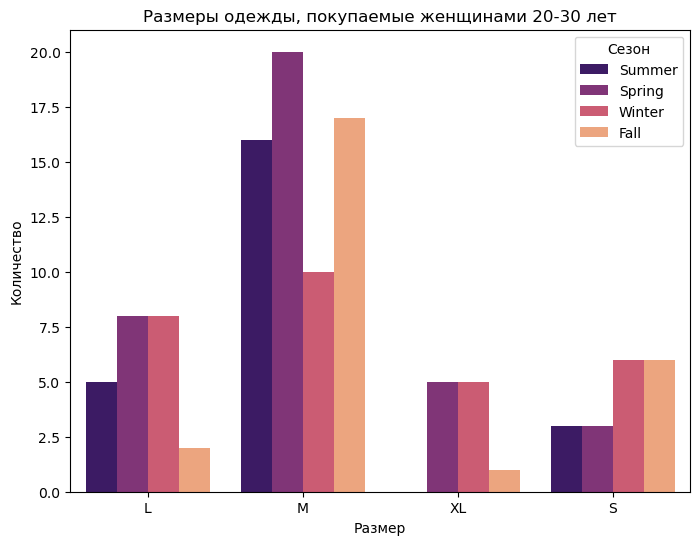

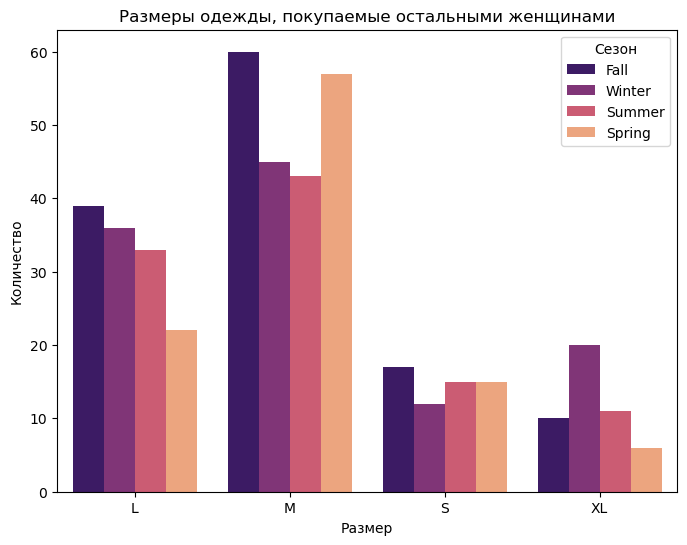

In [469]:
# Визуализация данных для женщин 20-30 лет
plt.figure(figsize=(8,6))
sns.countplot(x='Size', hue='Season', data=female_20_30[female_20_30['Category'] == 'Clothing'], palette='magma')
plt.title('Размеры одежды, покупаемые женщинами 20-30 лет')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.legend(title='Сезон')
plt.show()
# Визуализация данных для остальных женщин
plt.figure(figsize=(8,6))
sns.countplot(x='Size', hue='Season', data=other_female[other_female['Category'] == 'Clothing'], palette='magma')
plt.title('Размеры одежды, покупаемые остальными женщинами')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.legend(title='Сезон')
plt.show()



Гипотеза о том, что женщины в возрасте 20-30 лет чаще покупают одежду размером S зимой, не подтверждается. Доля таких покупательниц составляет всего 2%, что очень мало для значимого вывода. Напротив, женщины 20-30 лет, как и остальные, чаще выбирают размер M, независимо от сезона

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 4<br>
Скидки чаще применяются при оплате банковской картой
</div>


In [470]:
# Создаем булевый столбец 'Оплата банковской картой' (Credit Card или Debit Card)
df['Оплата банковской картой'] = df['Payment Method'].isin(['Credit Card', 'Debit Card'])
# Создаем таблицу сопряженности между способом оплаты и применением скидок
payment_discount_table = pd.crosstab(df['Оплата банковской картой'], df['Discount Applied'])

print("Таблица сопряженности:")
print(payment_discount_table)



Таблица сопряженности:
Discount Applied            No   Yes
Оплата банковской картой            
False                     1456  1115
True                       767   562


In [471]:
# Рассчитываем общее количество покупок для каждого способа оплаты
total_card = payment_discount_table.loc[True].sum()  # Общее количество покупок с оплатой картой
total_non_card = payment_discount_table.loc[False].sum()  # Общее количество покупок без оплаты картой
# Рассчитываем количество скидок для каждого способа оплаты
discount_card = payment_discount_table.loc[True, 'Yes']  # Скидки при оплате картой
discount_non_card = payment_discount_table.loc[False, 'Yes']  # Скидки без оплаты картой
# Рассчитываем долю скидок
ratio_card = discount_card / total_card if total_card > 0 else 0
ratio_non_card = discount_non_card / total_non_card if total_non_card > 0 else 0

# Выводим результаты
print(f"Доля скидок при оплате банковской картой: {ratio_card:.2f}")
print(f"Доля скидок при других способах оплаты: {ratio_non_card:.2f}")



Доля скидок при оплате банковской картой: 0.42
Доля скидок при других способах оплаты: 0.43


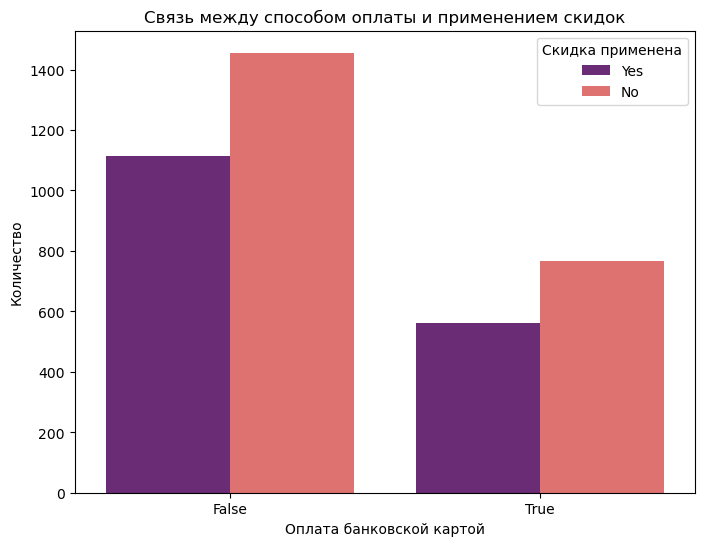

In [472]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.countplot(x='Оплата банковской картой', hue='Discount Applied', data=df, palette='magma')
plt.title('Связь между способом оплаты и применением скидок')
plt.xlabel('Оплата банковской картой')
plt.ylabel('Количество')
plt.legend(title='Скидка применена')
plt.show()



Гипотеза не подтверждается: скидки применяются с практически одинаковой частотой как при оплате банковской картой ~42% , так и при других способах оплаты ~43%. При оплате банковской картой, скидки применяются в 562 из 1329 случаев ~42%. При других способах оплаты, скидки применяются в 1115 из 2571 случаев ~43%

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 5<br>
Средний чек покупки выше зимой, чем весной
</div>


In [473]:
# Фильтруем данные для зимы и весны
winter_purchases = df[df['Season'] == 'Winter']['Purchase Amount (USD)']
spring_purchases = df[df['Season'] == 'Spring']['Purchase Amount (USD)']
# Вычисляем средние значения
mean_winter = winter_purchases.mean()
mean_spring = spring_purchases.mean()

print(f"Средний чек покупки зимой: ${mean_winter:.2f}")
print(f"Средний чек покупки весной: ${mean_spring:.2f}")



Средний чек покупки зимой: $60.36
Средний чек покупки весной: $58.74


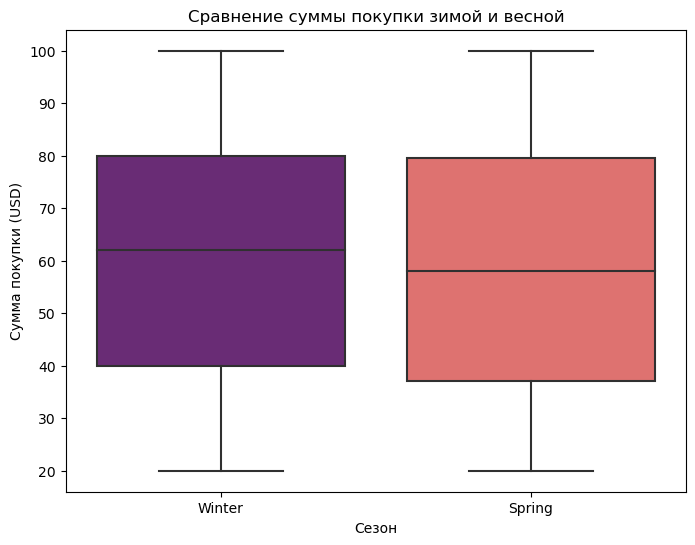

In [474]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df[df['Season'].isin(['Winter', 'Spring'])], palette='magma')
plt.title('Сравнение суммы покупки зимой и весной')
plt.xlabel('Сезон')
plt.ylabel('Сумма покупки (USD)')
plt.show()



Гипотеза подтверждается: средний чек зимой немного выше, чем весной, но разница очень мала и, вероятно, незначима в коммерческом контексте (1.62 USD). Boxplot показывает, что медианы зимних и весенних покупок практически совпадают.

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 6<br>
Пользователи без подписки чаще выбирают наличный расчет, чем с подпиской
</div>


In [475]:
# Создаем булевый столбец 'Выбор наличного расчета'
df['Выбор наличного расчета'] = df['Payment Method'] == 'Cash'
# Создаем таблицу сопряженности между статусом подписки и выбором наличного расчета
subscription_cash_table = pd.crosstab(df['Subscription Status'], df['Выбор наличного расчета'])

print("Таблица сопряженности:")
print(subscription_cash_table)



Таблица сопряженности:
Выбор наличного расчета  False  True 
Subscription Status                  
No                        2378    469
Yes                        874    179


In [476]:
# Рассчитываем общее количество пользователей в каждой группе подписки
total_no_subscription = subscription_cash_table.loc['No'].sum()  # Общее количество без подписки
total_with_subscription = subscription_cash_table.loc['Yes'].sum()  # Общее количество с подпиской
# Рассчитываем количество пользователей, выбравших наличный расчет, в каждой группе
cash_no_subscription = subscription_cash_table.loc['No', True]  # Наличный расчет без подписки
cash_with_subscription = subscription_cash_table.loc['Yes', True]  # Наличный расчет с подпиской
# Рассчитываем долю наличного расчета
ratio_no_subscription = cash_no_subscription / total_no_subscription if total_no_subscription > 0 else 0
ratio_with_subscription = cash_with_subscription / total_with_subscription if total_with_subscription > 0 else 0

print(f"Доля наличного расчета для пользователей без подписки: {ratio_no_subscription:.2%}")
print(f"Доля наличного расчета для пользователей с подпиской: {ratio_with_subscription:.2%}")



Доля наличного расчета для пользователей без подписки: 16.47%
Доля наличного расчета для пользователей с подпиской: 17.00%


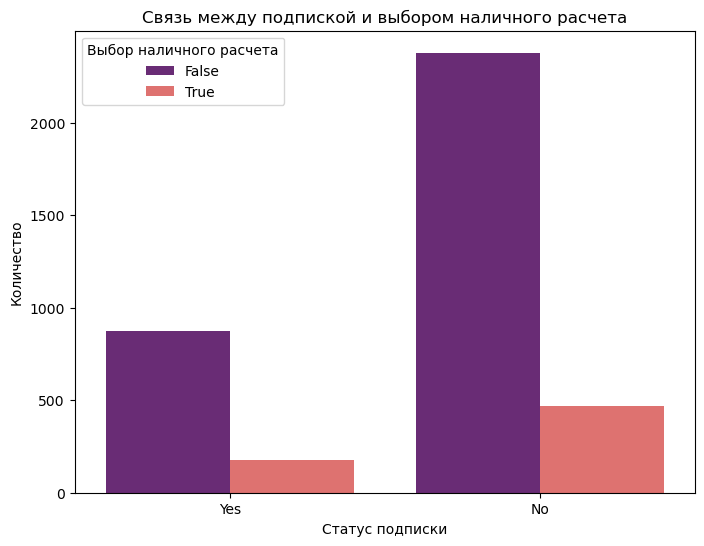

In [477]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Status', hue='Выбор наличного расчета', data=df, palette='magma')
plt.title('Связь между подпиской и выбором наличного расчета')
plt.xlabel('Статус подписки')
plt.ylabel('Количество')
plt.legend(title='Выбор наличного расчета')
plt.show()



Гипотеза не подтверждается: пользователи без подписки выбирают наличный расчет не чаще, чем пользователи с подпиской. Процентное соотношение почти идентично для обеих групп. Процентное соотношение пользователей, выбирающих наличный расчет, практически одинаково для обеих групп ~16-17%

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 7<br>
Пользователи без подписки чаще выбирают наличный расчет, чем с подпиской
</div>


In [478]:
# Создаем булевый столбец 'Оплата через мобильное приложение'
df['Оплата через мобильное приложение'] = df['Payment Method'].isin(['PayPal', 'Venmo'])
# Создаем булевый столбец 'Возраст до 25'
df['Возраст до 25'] = df['Age'] < 25
# Создаем таблицу сопряженности
without_subscription_cash_table = pd.crosstab(df['Возраст до 25'], df['Оплата через мобильное приложение'])

print("Таблица сопряженности:")
print(without_subscription_cash_table)



Таблица сопряженности:
Оплата через мобильное приложение  False  True 
Возраст до 25                                  
False                               2279   1135
True                                 330    156


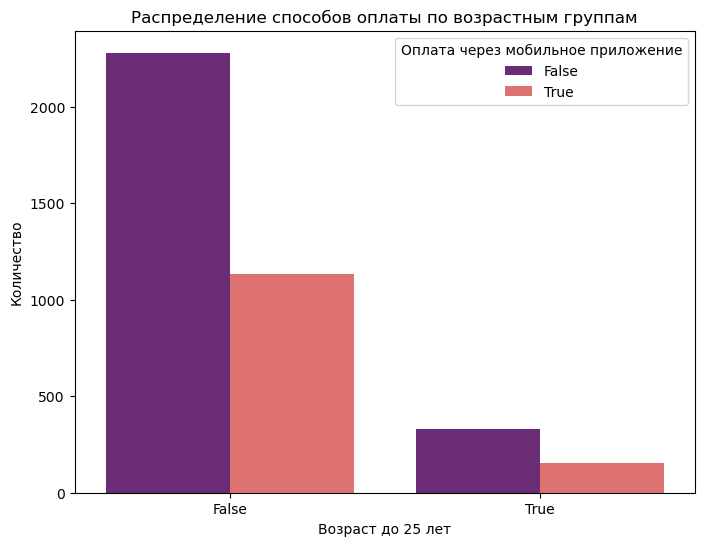

In [479]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.countplot(x='Возраст до 25', hue='Оплата через мобильное приложение', data=df, palette='magma')
plt.title('Распределение способов оплаты по возрастным группам')
plt.xlabel('Возраст до 25 лет')
plt.ylabel('Количество')
plt.legend(title='Оплата через мобильное приложение')
plt.show()



In [480]:
# Расчет пропорций
age_under_25 = df[df['Возраст до 25']]
mobile_payments_under_25 = age_under_25['Оплата через мобильное приложение'].sum()
total_under_25 = age_under_25.shape[0]
prop_under_25 = mobile_payments_under_25 / total_under_25
age_25_and_over = df[~df['Возраст до 25']]
mobile_payments_25_and_over = age_25_and_over['Оплата через мобильное приложение'].sum()
total_25_and_over = age_25_and_over.shape[0]
prop_25_and_over = mobile_payments_25_and_over / total_25_and_over

print(f"Доля мобильных платежей среди покупателей до 25 лет: {prop_under_25:.2f}")
print(f"Доля мобильных платежей среди покупателей 25 лет и старше: {prop_25_and_over:.2f}")



Доля мобильных платежей среди покупателей до 25 лет: 0.32
Доля мобильных платежей среди покупателей 25 лет и старше: 0.33


Гипотеза не подтверждается: Пользователи до 25 лет не чаще используют мобильные приложения для оплаты покупок, чем пользователи 25 лет и старше. Пропорции практически идентичны. Доли мобильных платежей среди обеих возрастных групп практически одинаковы, разница ~ 1%

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 8<br>
Средняя сумма покупки выше у пользователей, которые оставляют положительные оценки (больше 4)
</div>


In [481]:
# Выделяем суммы покупок для положительных и неположительных отзывов
positive_review_purchases = df[df['Положительный Отзыв']]['Purchase Amount (USD)']
negative_review_purchases = df[~df['Положительный Отзыв']]['Purchase Amount (USD)']
# Вычисляем средние значения
mean_positive = positive_review_purchases.mean()
mean_negative = negative_review_purchases.mean()

print(f"Средняя сумма покупки для положительных отзывов: ${mean_positive:.2f}")
print(f"Средняя сумма покупки для неположительных отзывов: ${mean_negative:.2f}")
print(f"Разница между средними суммами покупок: ${mean_positive - mean_negative:.2f}")



Средняя сумма покупки для положительных отзывов: $60.75
Средняя сумма покупки для неположительных отзывов: $59.17
Разница между средними суммами покупок: $1.58


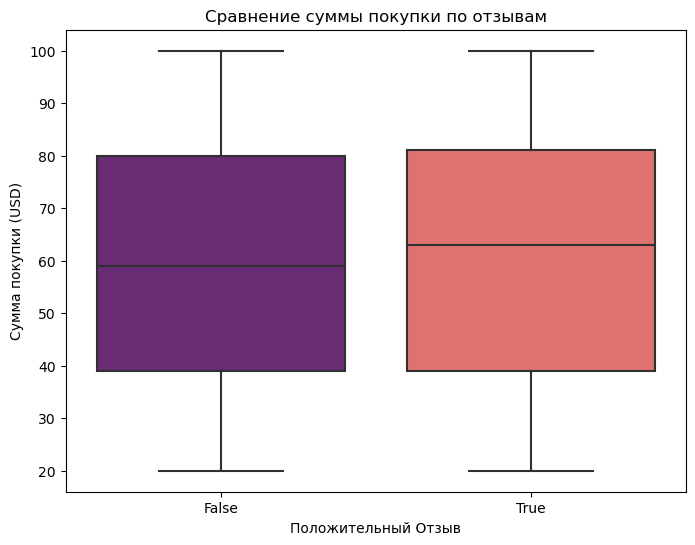

In [482]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.boxplot(x='Положительный Отзыв', y='Purchase Amount (USD)', data=df, palette='magma')
plt.title('Сравнение суммы покупки по отзывам')
plt.xlabel('Положительный Отзыв')
plt.ylabel('Сумма покупки (USD)')
plt.show()



Гипотеза частично подтверждается: cредняя сумма покупки для пользователей с положительными отзывами действительно выше, но разница настолько мала, что ее влияние может быть статистически незначимым. Разница между средними суммами покупок составляет $1.58, что не является значительным отличием

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
Гипотеза 9<br>
Покупатели, использующие банковскую карту, совершают больше предыдущих покупок
</div>


In [483]:
# Создаем булевый столбец 'Использует банковскую карту'
df['Использует банковскую карту'] = df['Payment Method'].isin(['Credit Card', 'Debit Card'])
# Выделяем количество предыдущих покупок
prev_purchases_bank = df[df['Использует банковскую карту']]['Previous Purchases']
prev_purchases_other = df[~df['Использует банковскую карту']]['Previous Purchases']
# Вычисляем средние значения
mean_bank = prev_purchases_bank.mean()
mean_other = prev_purchases_other.mean()

print(f"Среднее количество предыдущих покупок для пользователей банковских карт: {mean_bank:.2f}")
print(f"Среднее количество предыдущих покупок для остальных пользователей: {mean_other:.2f}")



Среднее количество предыдущих покупок для пользователей банковских карт: 24.77
Среднее количество предыдущих покупок для остальных пользователей: 25.65


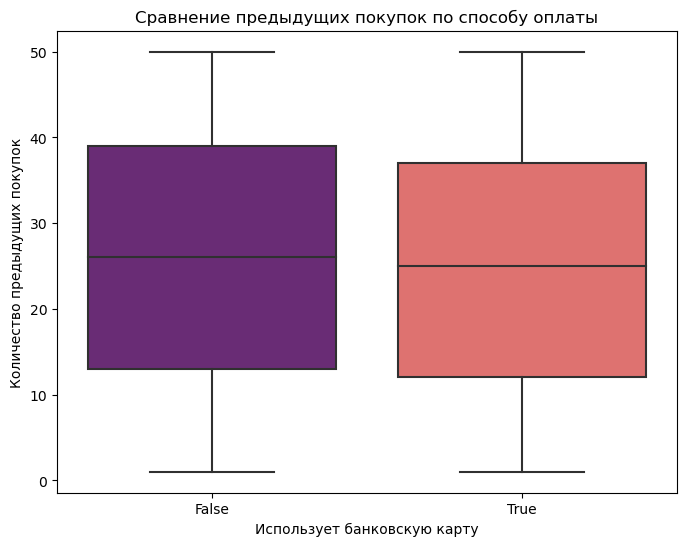

In [484]:
# Визуализация данных
plt.figure(figsize=(8,6))
sns.boxplot(x='Использует банковскую карту', y='Previous Purchases', data=df, palette='magma')
plt.title('Сравнение предыдущих покупок по способу оплаты')
plt.xlabel('Использует банковскую карту')
plt.ylabel('Количество предыдущих покупок')
plt.show()



Гипотеза не подтверждается: Пользователи, использующие банковскую карту, не совершают больше предыдущих покупок. Напротив, пользователи, не использующие карту, имеют немного большее среднее количество предыдущих покупок, но разница очень мала. Boxplot показывает, что распределения количества предыдущих покупок для обеих групп почти совпадают

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
1. Найдите самый популярный товар<br>
</div>

In [485]:
# Подсчитываем количество покупок каждого товара
product_counts = df['Item Purchased'].value_counts()
# Выводим самый популярный товар
most_popular_product = product_counts.idxmax()

print(f"Самый популярный товар: {most_popular_product}")
print("\nТоп-5 популярных товаров:")
product_counts.head()



Самый популярный товар: Blouse

Топ-5 популярных товаров:


Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

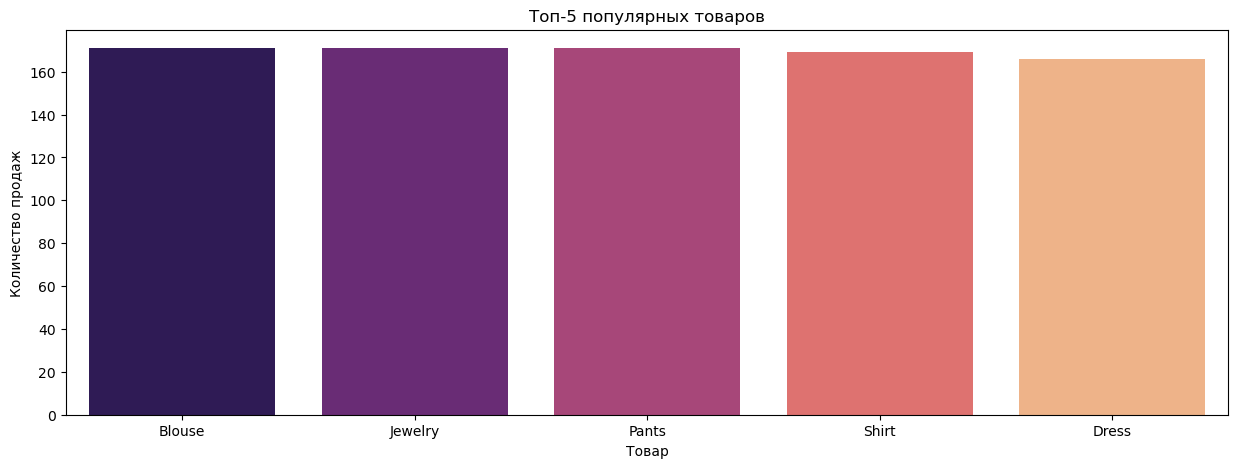

In [486]:
# Визуализация топ-5 популярных товаров
plt.figure(figsize=(15,5))
sns.barplot(x=product_counts.head(5).index, y=product_counts.head(5).values, palette='magma')
plt.title('Топ-5 популярных товаров')
plt.xlabel('Товар')
plt.ylabel('Количество продаж')
plt.show()



<div style="line-height:1.5; font-weight:bold; font-size:150%;">
2. Постройте распределение покупателей по полу<br>
</div>

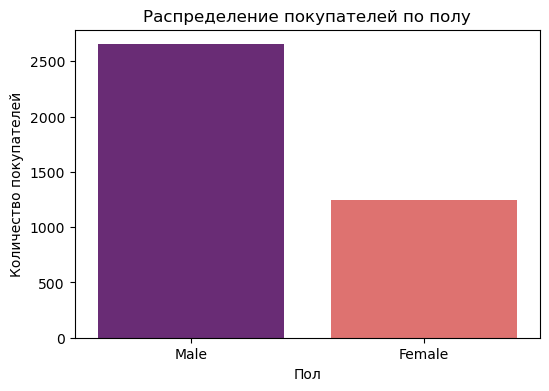

In [487]:
# Подсчитываем количество покупателей по полу
gender_counts = df['Gender'].value_counts()
# Визуализация распределения покупателей по полу
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='magma')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.show()



<div style="line-height:1.5; font-weight:bold; font-size:150%;">
3. Определите, какой пол и возраст покупает больше всего, чаще всего, самые дорогие товары<br>
</div>

Общая сумма покупок по полу:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


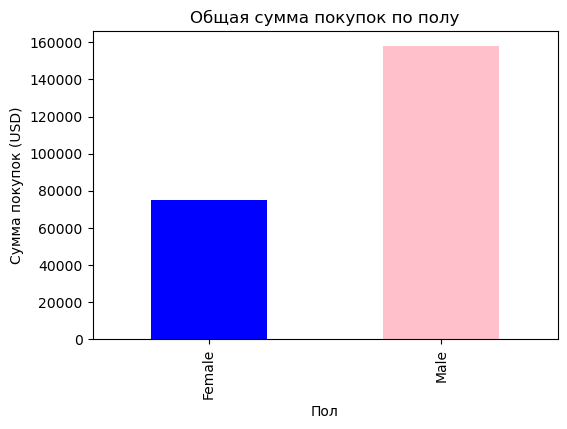

In [488]:
# Сумма покупок по полу
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Общая сумма покупок по полу:")
print(total_purchase_by_gender)
# Визуализация
plt.figure(figsize=(6,4))
total_purchase_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Общая сумма покупок по полу')
plt.xlabel('Пол')
plt.ylabel('Сумма покупок (USD)')
plt.show()



Количество покупок по полу:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


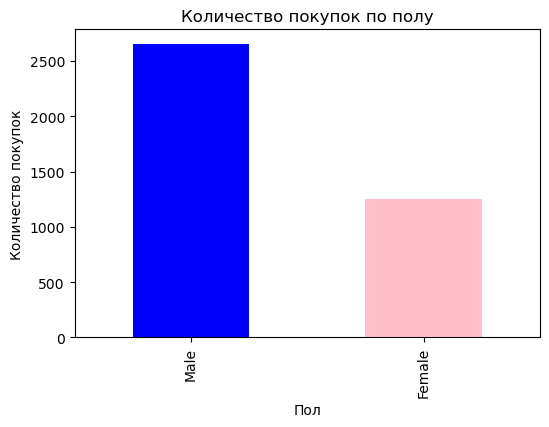

In [489]:
# Количество покупок по полу
purchase_count_by_gender = df['Gender'].value_counts()
print("Количество покупок по полу:")
print(purchase_count_by_gender)
# Визуализация
plt.figure(figsize=(6,4))
purchase_count_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Количество покупок по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупок')
plt.show()



Средняя сумма покупки по полу:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


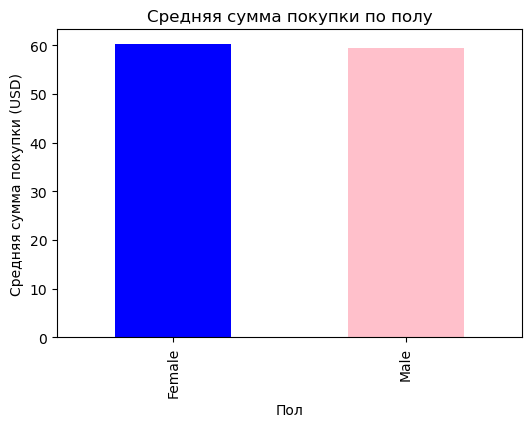

In [490]:
# Средняя сумма покупки по полу
average_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()
print("Средняя сумма покупки по полу:")
print(average_purchase_by_gender)
# Визуализация
plt.figure(figsize=(6,4))
average_purchase_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Средняя сумма покупки по полу')
plt.xlabel('Пол')
plt.ylabel('Средняя сумма покупки (USD)')
plt.show()



In [491]:
# Создаем категории возрастов
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['до 25', '25-35', '35-45', '45-55', '55-65', 'старше 65']
df['Возрастная группа'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



Общая сумма покупок по возрастным группам:
Возрастная группа
до 25        29258
25-35        45400
35-45        43463
45-55        45370
55-65        44096
старше 65    25494
Name: Purchase Amount (USD), dtype: int64


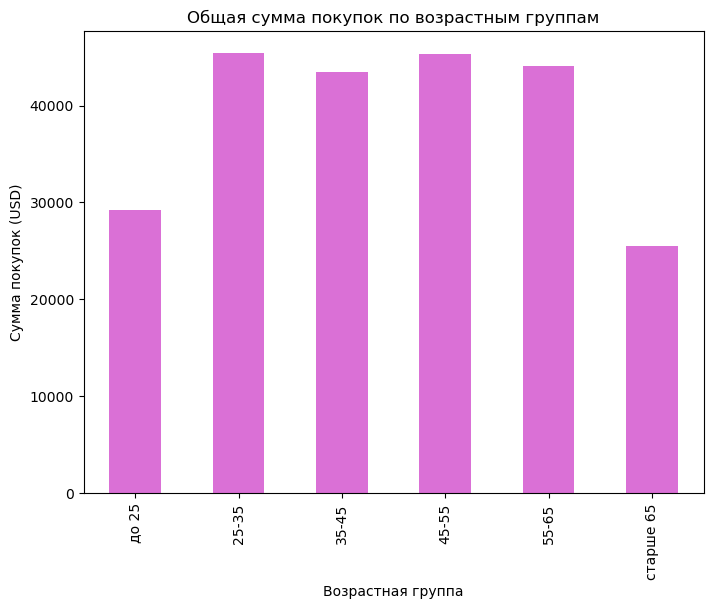

In [492]:
# Сумма покупок по возрастным группам
total_purchase_by_age = df.groupby('Возрастная группа')['Purchase Amount (USD)'].sum()
print("Общая сумма покупок по возрастным группам:")
print(total_purchase_by_age)
# Визуализация общей суммы покупок по возрастным группам
plt.figure(figsize=(8,6))
total_purchase_by_age.plot(kind='bar', color='orchid')
plt.title('Общая сумма покупок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Сумма покупок (USD)')
plt.show()




Количество покупок по возрастным группам:
Возрастная группа
до 25        486
25-35        755
35-45        729
45-55        752
55-65        751
старше 65    427
Name: count, dtype: int64


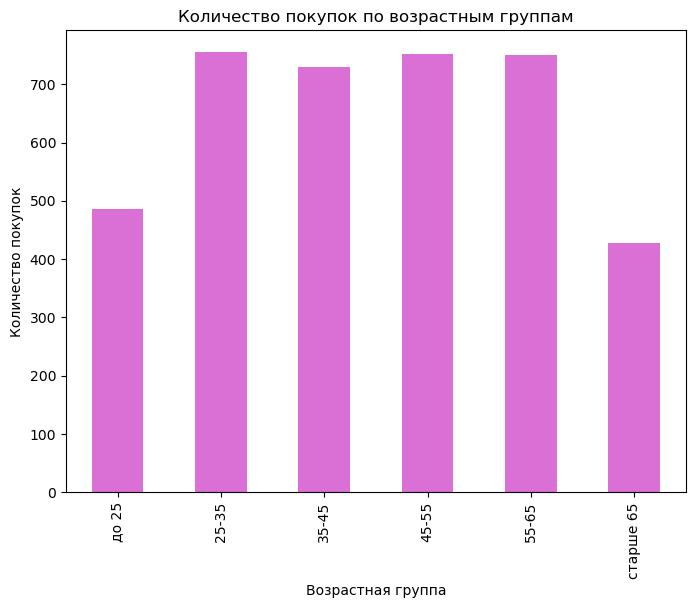

In [493]:
# Количество покупок по возрастным группам
purchase_count_by_age = df['Возрастная группа'].value_counts().sort_index()
print("\nКоличество покупок по возрастным группам:")
print(purchase_count_by_age)
# Визуализация количества покупок по возрастным группам
plt.figure(figsize=(8,6))
purchase_count_by_age.plot(kind='bar', color='orchid')
plt.title('Количество покупок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество покупок')
plt.show()




Средняя сумма покупки по возрастным группам:
Возрастная группа
до 25        60.201646
25-35        60.132450
35-45        59.620027
45-55        60.332447
55-65        58.716378
старше 65    59.704918
Name: Purchase Amount (USD), dtype: float64


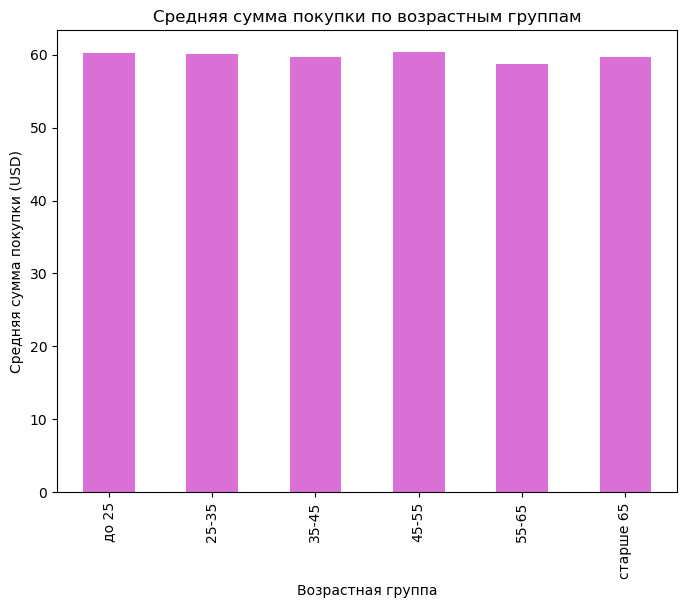

In [494]:
# Средняя сумма покупки по возрастным группам
average_purchase_by_age = df.groupby('Возрастная группа')['Purchase Amount (USD)'].mean()
print("\nСредняя сумма покупки по возрастным группам:")
print(average_purchase_by_age)
# Визуализация средней суммы покупки по возрастным группам
plt.figure(figsize=(8,6))
average_purchase_by_age.plot(kind='bar', color='orchid')
plt.title('Средняя сумма покупки по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя сумма покупки (USD)')
plt.show()



<div style="line-height:1.5; font-weight:bold; font-size:150%;">
4. Определите, есть ли зависимость между цветом одежды и сезоном<br>
</div>

In [495]:
# Фильтруем данные только для категории 'Clothing'
clothing_df = df[df['Category'] == 'Clothing']
# Создаем таблицу сопряженности между цветом и сезоном
color_season_table = pd.crosstab(clothing_df['Color'], clothing_df['Season'])
print("Таблица сопряженности между цветом одежды и сезоном:")
print(color_season_table)



Таблица сопряженности между цветом одежды и сезоном:
Season     Fall  Spring  Summer  Winter
Color                                  
Beige        16      17      17      15
Black        22      22      21      16
Blue          7      16      14      12
Brown        16      15      10      20
Charcoal     16      21      14      22
Cyan         18      17      21      20
Gold         17      17      11      17
Gray         17      20      13      12
Green        14      22      24      18
Indigo       20      10      13      16
Lavender     13      14      17      16
Magenta      21      13      13      12
Maroon       21      21      16      25
Olive        15      18      13      15
Orange       26      20      16      16
Peach        16      20      10      19
Pink         16      21      11      25
Purple       18      18      18      18
Red          14      15      20      19
Silver       18      20      29      13
Teal         21      21      23      19
Turquoise    14      17    

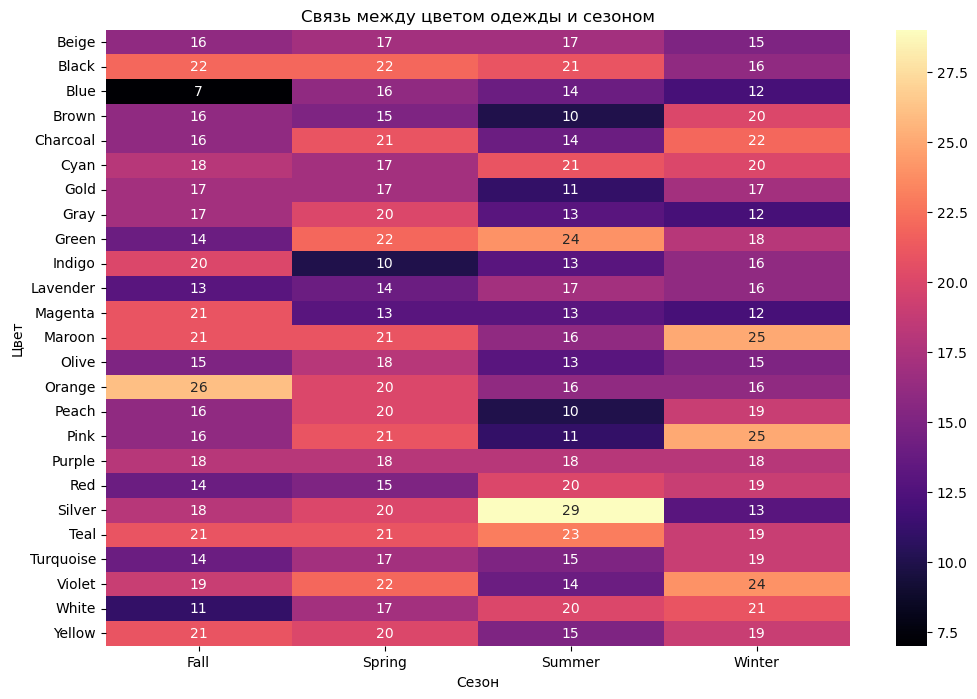

In [496]:
# Визуализация тепловой карты
plt.figure(figsize=(12,8))
sns.heatmap(color_season_table, annot=True, fmt="d", cmap='magma')
plt.title('Связь между цветом одежды и сезоном')
plt.xlabel('Сезон')
plt.ylabel('Цвет')
plt.show()



Анализ зависимости между цветом одежды и сезоном показывает, что предпочтения покупателей варьируются в зависимости от времени года. Осенью наиболее популярны оранжевые и чёрные цвета, тогда как весной преобладают зелёный и фиолетовый. Летом покупатели чаще выбирают светлые и яркие цвета, например серебристый и зелёный, а зимой популярны насыщенные тона, такие как бордовый и розовый. Некоторые цвета, такие как пурпурный и бежевый, остаются универсальными и равномерно распределены по всем сезонам

<div style="line-height:1.5; font-weight:bold; font-size:150%;">
5. Посчитайте сезонный MAU (уникальных пользователей за сезон) и его динамику<br>
</div>

Сезонный MAU (количество уникальных пользователей):
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64


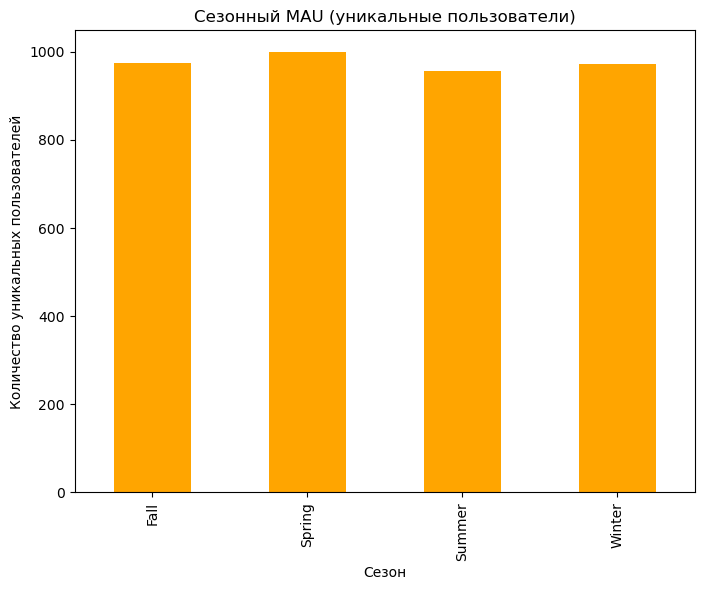

In [497]:
# Считаем уникальных пользователей (Customer ID) за каждый сезон
seasonal_mau = df.groupby('Season')['Customer ID'].nunique()
print("Сезонный MAU (количество уникальных пользователей):")
print(seasonal_mau)
# Визуализация MAU по сезонам
plt.figure(figsize=(8,6))
seasonal_mau.plot(kind='bar', color='orange')
plt.title('Сезонный MAU (уникальные пользователи)')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')
plt.show()



<div style="line-height:1.5; font-weight:bold; font-size:150%;">
6. Найдите самую популярную букву в названии одежды<br>
</div>

Самая популярная буква в названиях одежды: 's'

Топ-5 самых популярных букв:
's': 4063 раз(а)
'e': 2347 раз(а)
'a': 2312 раз(а)
't': 1896 раз(а)
'o': 1528 раз(а)


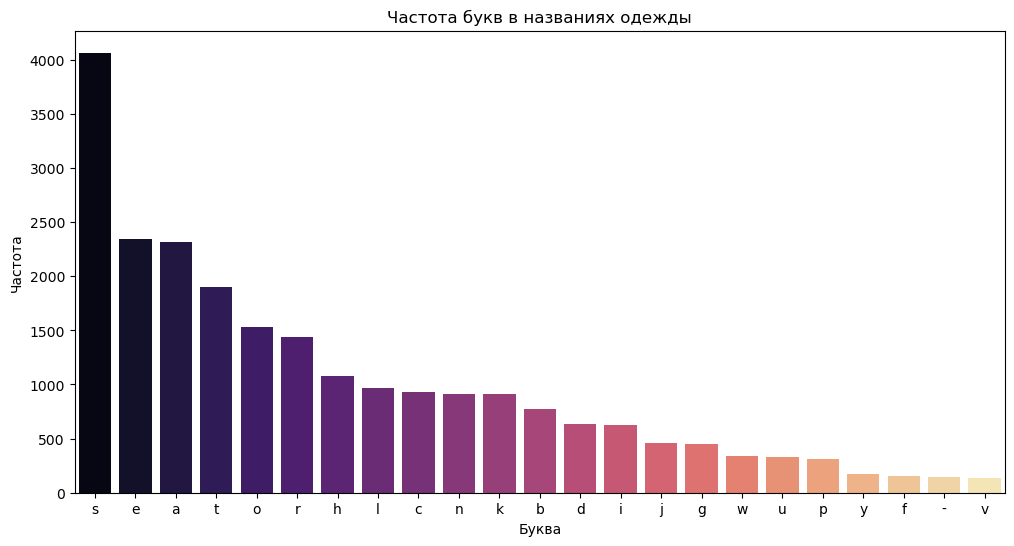

In [498]:
# Объединяем все названия товаров в один текст
all_item_names = ' '.join(df['Item Purchased'].astype(str))
# Убираем пробелы и преобразуем в нижний регистр
all_letters = all_item_names.replace(' ', '').lower()
# Подсчитываем частоту каждой буквы
letter_counts = Counter(all_letters)
# Находим самую популярную букву
most_common_letter = letter_counts.most_common(1)[0][0]
print(f"Самая популярная буква в названиях одежды: '{most_common_letter}'")
# Выводим топ-5 самых популярных букв
print("\nТоп-5 самых популярных букв:")
for letter, count in letter_counts.most_common(5):
    print(f"'{letter}': {count} раз(а)")
# Визуализация частоты букв
letters, counts = zip(*letter_counts.most_common())
plt.figure(figsize=(12,6))
sns.barplot(x=list(letters), y=list(counts), palette='magma')
plt.title('Частота букв в названиях одежды')
plt.xlabel('Буква')
plt.ylabel('Частота')
plt.show()



<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [499]:
# Указываем URL CSV-файла на GitHub
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv'
# Загружаем данные в DataFrame
df = pd.read_csv(url)



In [500]:
df.head()



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [501]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


В данныз нет пропусков, так как во всех столбцах количество ненулевых значений non-null count совпадает с общим количеством строк 193

Топ-10 стран по потреблению пива:
            country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343
135          Poland            343
188       Venezuela            333
81          Ireland            313
129           Palau            306
140         Romania            297


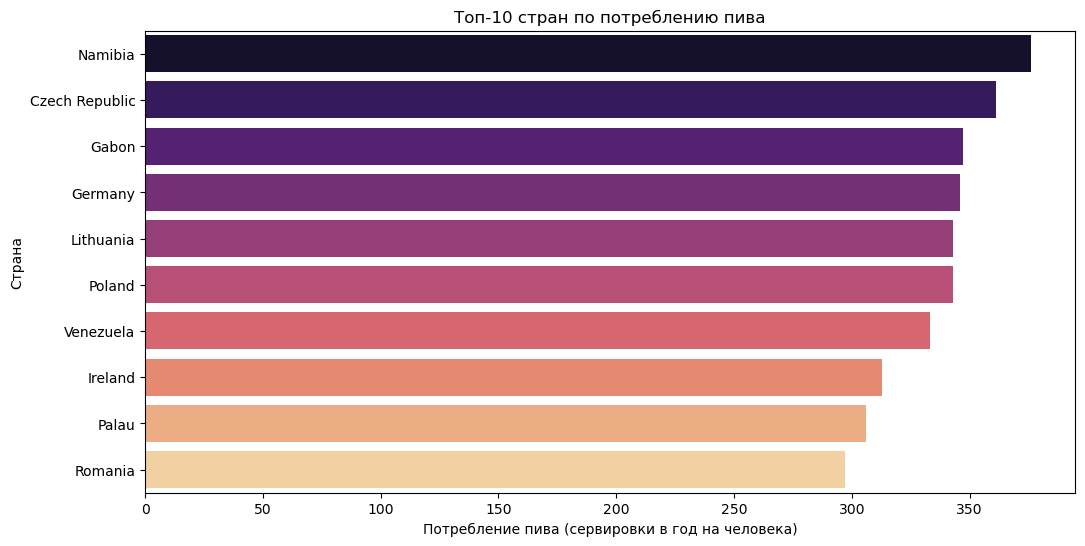

In [502]:
# Сортировка данных по потреблению пива и выбор топ-10 стран
top_beer = df.sort_values('beer_servings', ascending=False).head(10)
print("Топ-10 стран по потреблению пива:")
print(top_beer[['country', 'beer_servings']])
plt.figure(figsize=(12,6))
sns.barplot(x='beer_servings', y='country', data=top_beer, palette='magma')
plt.title('Топ-10 стран по потреблению пива')
plt.xlabel('Потребление пива (сервировки в год на человека)')
plt.ylabel('Страна')
plt.show()




Топ-10 стран по потреблению вина:
               country  wine_servings
61              France            370
136           Portugal            339
3              Andorra            312
166        Switzerland            280
48             Denmark            278
156           Slovenia            276
99          Luxembourg            271
42             Croatia            254
83               Italy            237
55   Equatorial Guinea            233


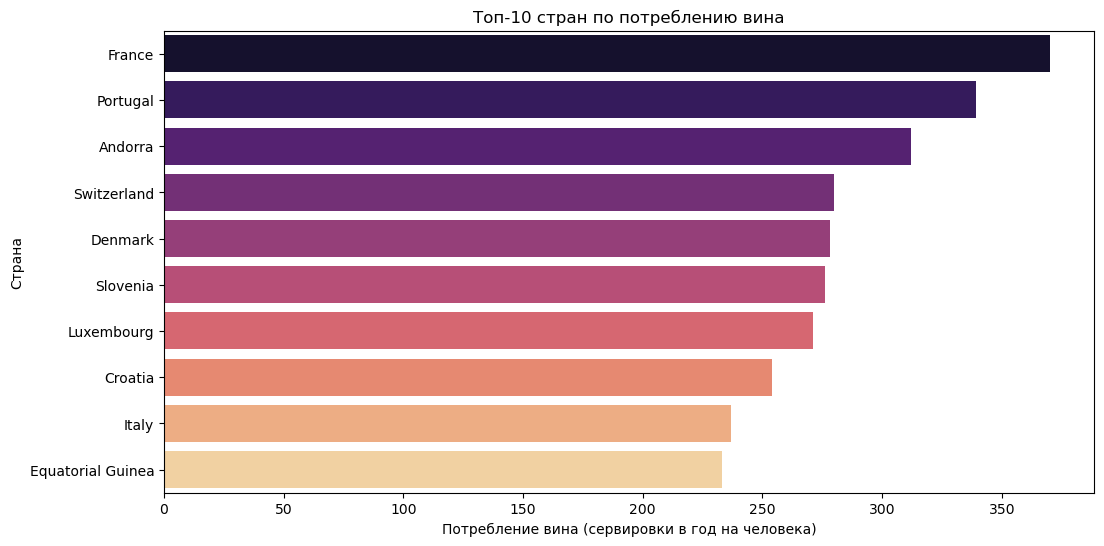

In [503]:
# Сортировка данных по потреблению вина и выбор топ-10 стран
top_wine = df.sort_values('wine_servings', ascending=False).head(10)
print("\nТоп-10 стран по потреблению вина:")
print(top_wine[['country', 'wine_servings']])
# Визуализация
plt.figure(figsize=(12,6))
sns.barplot(x='wine_servings', y='country', data=top_wine,palette='magma')
plt.title('Топ-10 стран по потреблению вина')
plt.xlabel('Потребление вина (сервировки в год на человека)')
plt.ylabel('Страна')
plt.show()




Топ-10 стран по потреблению других спиртных напитков:
                country  spirit_servings
68              Grenada              438
15              Belarus              373
73                Haiti              326
141  Russian Federation              326
144           St. Lucia              315
72               Guyana              302
155            Slovakia              293
50             Dominica              286
169            Thailand              258
40         Cook Islands              254


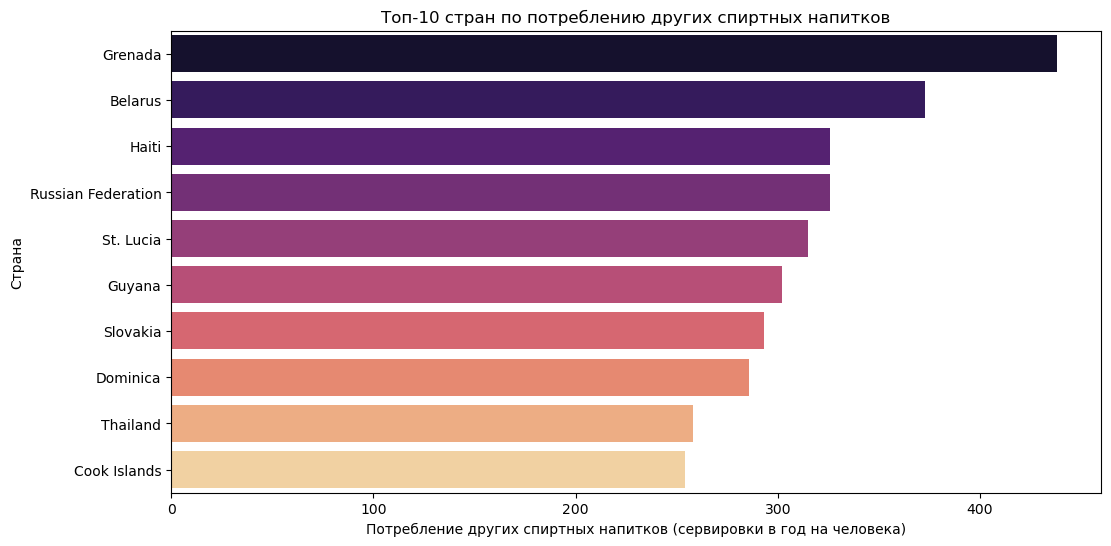

In [504]:
# Сортировка данных по потреблению других спиртных напитков и выбор топ-10 стран
top_spirits = df.sort_values('spirit_servings', ascending=False).head(10)
print("\nТоп-10 стран по потреблению других спиртных напитков:")
print(top_spirits[['country', 'spirit_servings']])
# Визуализация
plt.figure(figsize=(12,6))
sns.barplot(x='spirit_servings', y='country', data=top_spirits,palette='magma')
plt.title('Топ-10 стран по потреблению других спиртных напитков')
plt.xlabel('Потребление других спиртных напитков (сервировки в год на человека)')
plt.ylabel('Страна')
plt.show()




Топ-10 стран по общему потреблению алкоголя:
                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
155            Slovakia                          11.4
99           Luxembourg                          11.4


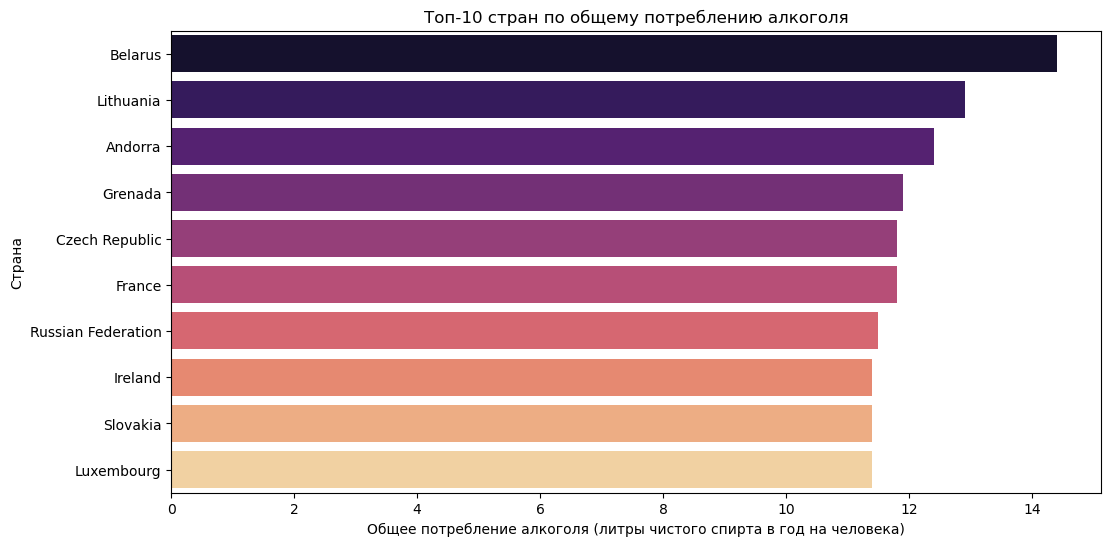

In [505]:
# Сортировка данных по общему потреблению алкоголя и выбор топ-10 стран
top_total = df.sort_values('total_litres_of_pure_alcohol', ascending=False).head(10)
print("\nТоп-10 стран по общему потреблению алкоголя:")
print(top_total[['country', 'total_litres_of_pure_alcohol']])
# Визуализация
plt.figure(figsize=(12,6))
sns.barplot(x='total_litres_of_pure_alcohol', y='country', data=top_total,palette='magma')
plt.title('Топ-10 стран по общему потреблению алкоголя')
plt.xlabel('Общее потребление алкоголя (литры чистого спирта в год на человека)')
plt.ylabel('Страна')
plt.show()




Корреляция между потреблением разных видов алкоголя:
                              beer_servings  wine_servings  spirit_servings  \
beer_servings                      1.000000       0.527172         0.458819   
wine_servings                      0.527172       1.000000         0.194797   
spirit_servings                    0.458819       0.194797         1.000000   
total_litres_of_pure_alcohol       0.835839       0.667598         0.654968   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
wine_servings                                     0.667598  
spirit_servings                                   0.654968  
total_litres_of_pure_alcohol                      1.000000  


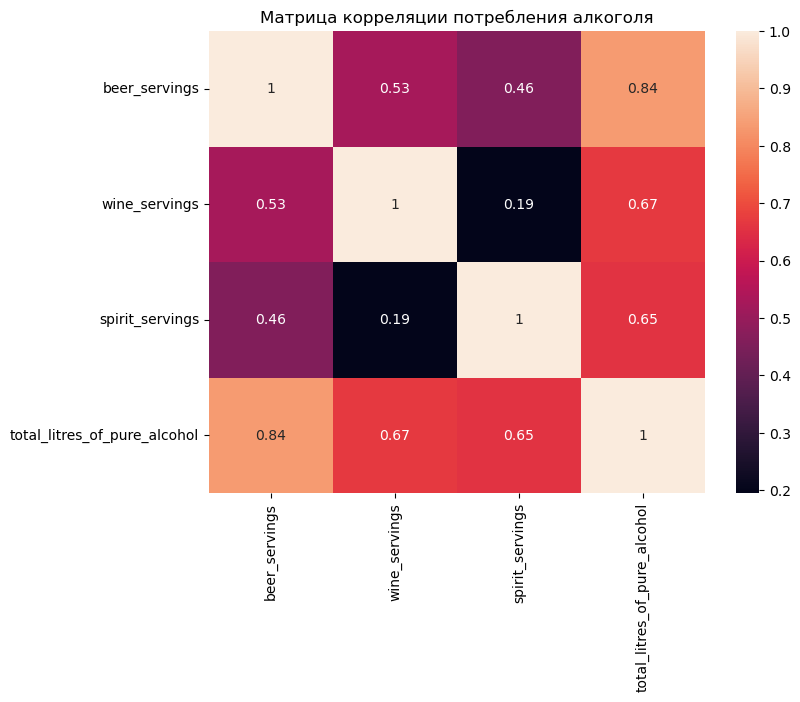

In [506]:
# Вычисляем корреляцию
corr = df[['beer_servings', 'wine_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']].corr()
print("\nКорреляция между потреблением разных видов алкоголя:")
print(corr)
# Визуализация тепловой карты корреляции
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Матрица корреляции потребления алкоголя')
plt.show()



Пиво: наибольший объём потребления пива отмечается в Намибии (376), Чехии (361), и Габоне (347). Чехия традиционно известна своими пивными традициями

Вино: Франция (370), Португалия (339) и Андорра (312) лидируют по потреблению вина, что подтверждает популярность винных культур в европейских странах

Другие спиртные напитки: на первом месте Гренада (438), затем Белоруссия (373) и Гаити (326). Это указывает на региональные особенности в предпочтении крепких напитков

Общее потребление алкоголя: Белоруссия (14.4 литра чистого алкоголя на человека) занимает первое место, за ней следуют Литва (12.9) и Андорра (12.4), что свидетельствует о высоком общем уровне употребления алкоголя в этих странах

Между потреблением пива и общего объёма алкоголя существует высокая положительная корреляция (0.835), что указывает на значительный вклад пива в общее потребление алкоголя

<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [507]:
# Указываем URL CSV-файла на GitHub
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/tarantino/tarantino.csv'
# Загружаем данные в DataFrame
df = pd.read_csv(url)



In [508]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


В данныз нет пропусков, так как во всех столбцах количество ненулевых значений non-null count совпадает с общим количеством строк 1894

In [509]:
# Подсчитываем количество проклятий по фильмам
curses_per_movie = df[df['type'] == 'word'].groupby('movie').size().reset_index(name='num_curses')
print("Количество проклятий по фильмам:")
print(curses_per_movie)



Количество проклятий по фильмам:
                 movie  num_curses
0     Django Unchained         262
1  Inglorious Basterds          58
2         Jackie Brown         368
3    Kill Bill: Vol. 1          57
4    Kill Bill: Vol. 2          69
5         Pulp Fiction         469
6       Reservoir Dogs         421


In [510]:
# Подсчитываем количество летальных исходов по фильмам
deaths_per_movie = df[df['type'] == 'death'].groupby('movie').size().reset_index(name='num_deaths')
print("\nКоличество летальных исходов по фильмам:")
print(deaths_per_movie)




Количество летальных исходов по фильмам:
                 movie  num_deaths
0     Django Unchained          47
1  Inglorious Basterds          48
2         Jackie Brown           4
3    Kill Bill: Vol. 1          63
4    Kill Bill: Vol. 2          11
5         Pulp Fiction           7
6       Reservoir Dogs          10


In [511]:
import numpy as np
# Объединяем данные по фильмам
summary = pd.merge(curses_per_movie, deaths_per_movie, on='movie', how='left')
# Заполняем отсутствующие значения нулями
summary['num_deaths'] = summary['num_deaths'].fillna(0).astype(int)
# Вычисляем соотношение проклятий к летальным исходам
summary['curses_per_death'] = summary['num_curses'] / summary['num_deaths'].replace(0, np.nan)

print("\nСводная таблица по фильмам:")
print(summary)




Сводная таблица по фильмам:
                 movie  num_curses  num_deaths  curses_per_death
0     Django Unchained         262          47          5.574468
1  Inglorious Basterds          58          48          1.208333
2         Jackie Brown         368           4         92.000000
3    Kill Bill: Vol. 1          57          63          0.904762
4    Kill Bill: Vol. 2          69          11          6.272727
5         Pulp Fiction         469           7         67.000000
6       Reservoir Dogs         421          10         42.100000


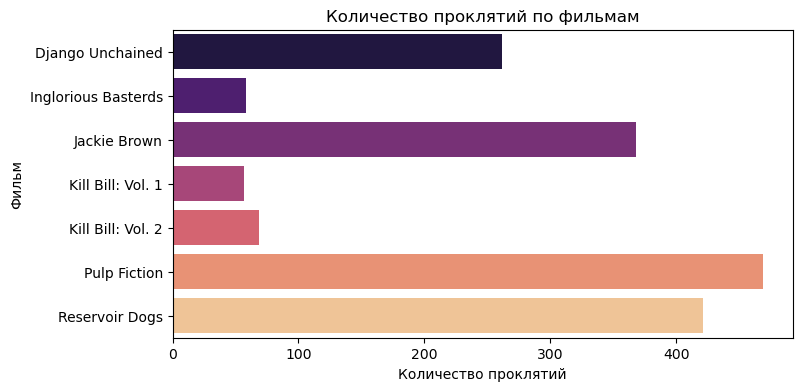

In [512]:
# График количества проклятий по фильмам
plt.figure(figsize=(8,4))
sns.barplot(x='num_curses', y='movie', data=summary,  palette='magma')
plt.title('Количество проклятий по фильмам')
plt.xlabel('Количество проклятий')
plt.ylabel('Фильм')
plt.show()



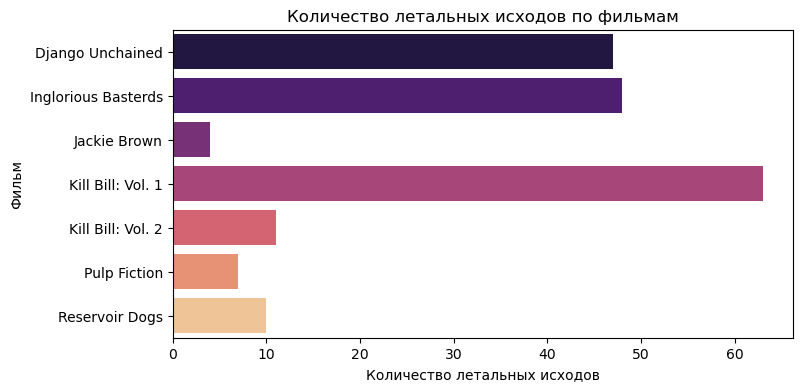

In [513]:
# График количества летальных исходов по фильмам
plt.figure(figsize=(8,4))
sns.barplot(x='num_deaths', y='movie', data=summary, palette='magma')
plt.title('Количество летальных исходов по фильмам')
plt.xlabel('Количество летальных исходов')
plt.ylabel('Фильм')
plt.show()



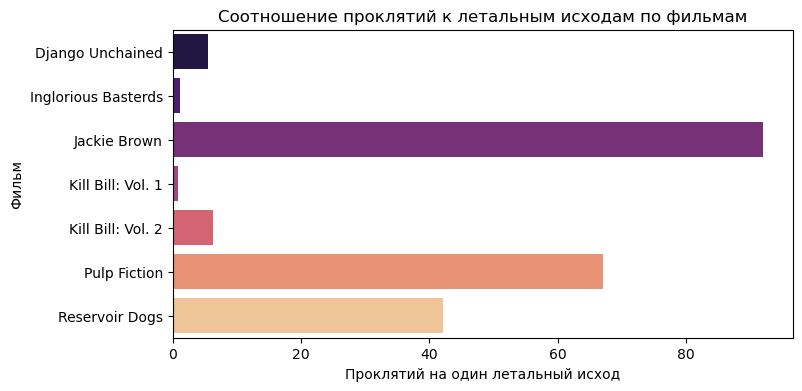

In [514]:
# Заменяем бесконечности и NaN на нули для визуализации
summary['curses_per_death'].replace([np.inf, np.nan], 0, inplace=True)
# График соотношения проклятий к летальным исходам
plt.figure(figsize=(8,4))
sns.barplot(x='curses_per_death', y='movie', data=summary,  palette='magma')
plt.title('Соотношение проклятий к летальным исходам по фильмам')
plt.xlabel('Проклятий на один летальный исход')
plt.ylabel('Фильм')
plt.show()



In [515]:
# Подсчитываем частоту каждого проклятия
curse_counts = df[df['type'] == 'word']['word'].value_counts().reset_index()
curse_counts.columns = ['curse_word', 'frequency']

print("\nЧастота употребления проклятий:")
print(curse_counts)




Частота употребления проклятий:
       curse_word  frequency
0         fucking        407
1            shit        221
2            fuck        213
3         n-word         179
4             ass        140
5         goddamn        113
6    motherfucker         70
7           bitch         64
8            hell         45
9            damn         37
10  motherfucking         27
11         fucked         25
12       bullshit         15
13  motherfuckers         15
14           dick         14
15          pussy         11
16        asshole         10
17        bastard         10
18        bitches          9
19         fucker          8
20       assholes          5
21         negro           5
22          dicks          5
23          asses          4
24         shitty          4
25         damned          3
26          fucks          3
27       shithead          3
28      horseshit          2
29          gooks          2
30           japs          2
31           cunt          2
32       s

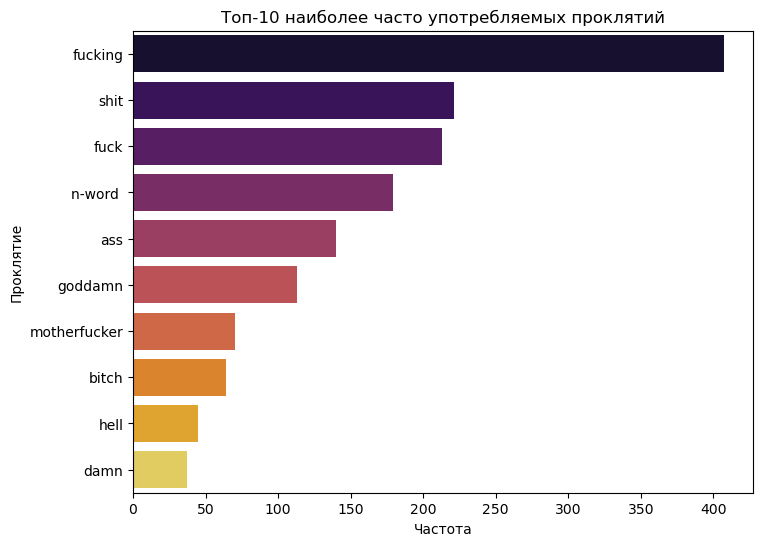

In [516]:
# Топ-10 наиболее часто употребляемых проклятий
top_10_curses = curse_counts.head(10)
plt.figure(figsize=(8,6))
sns.barplot(x='frequency', y='curse_word', data=top_10_curses, palette='inferno')
plt.title('Топ-10 наиболее часто употребляемых проклятий')
plt.xlabel('Частота')
plt.ylabel('Проклятие')
plt.show()



In [517]:
# Сортируем проклятия по фильму и минуте
curses_sorted = df[df['type'] == 'word'].sort_values(['movie', 'minutes_in']).reset_index(drop=True)
# Вычисляем разницу во времени между проклятиями
curses_sorted['time_diff'] = curses_sorted.groupby('movie')['minutes_in'].diff()
# Убираем первые значения (NaN)
time_diffs = curses_sorted['time_diff'].dropna()

print("\nСтатистики по времени между проклятиями (в минутах):")
print(time_diffs.describe())




Статистики по времени между проклятиями (в минутах):
count    1697.000000
mean        0.513913
std         1.374654
min         0.000000
25%         0.040000
50%         0.100000
75%         0.380000
max        16.720000
Name: time_diff, dtype: float64


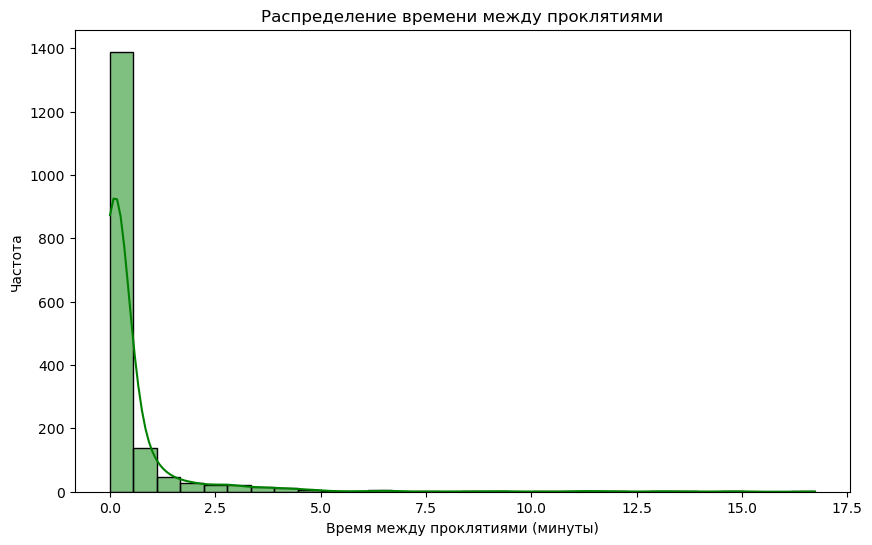

In [518]:
# Гистограмма распределения времени между проклятиями
plt.figure(figsize=(10,6))
sns.histplot(time_diffs, bins=30, kde=True, color='green')
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями (минуты)')
plt.ylabel('Частота')
plt.show()



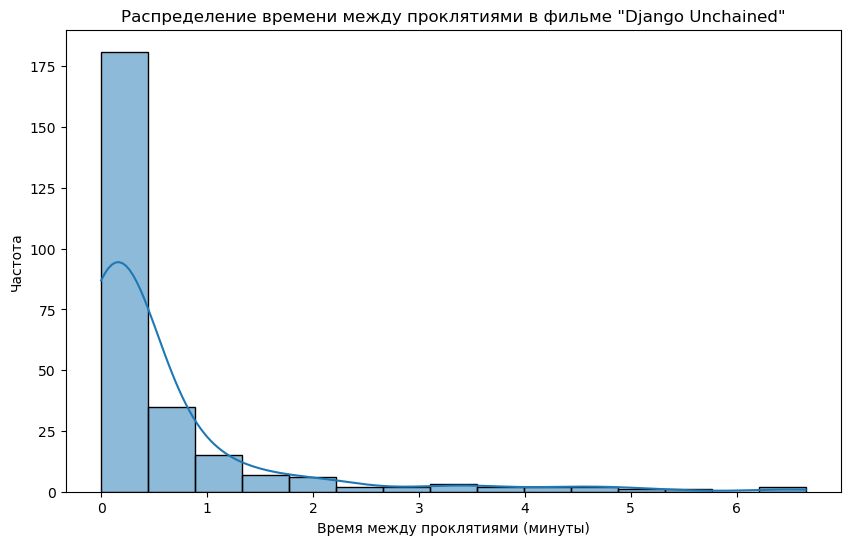

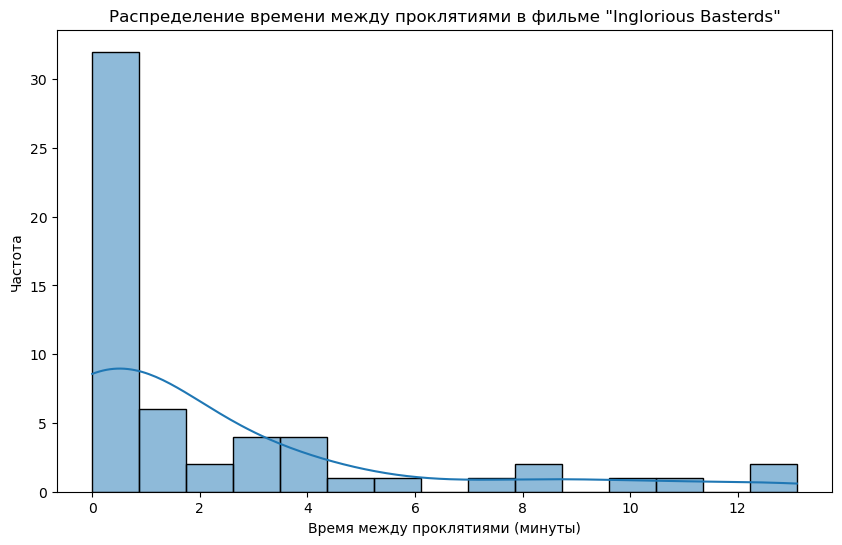

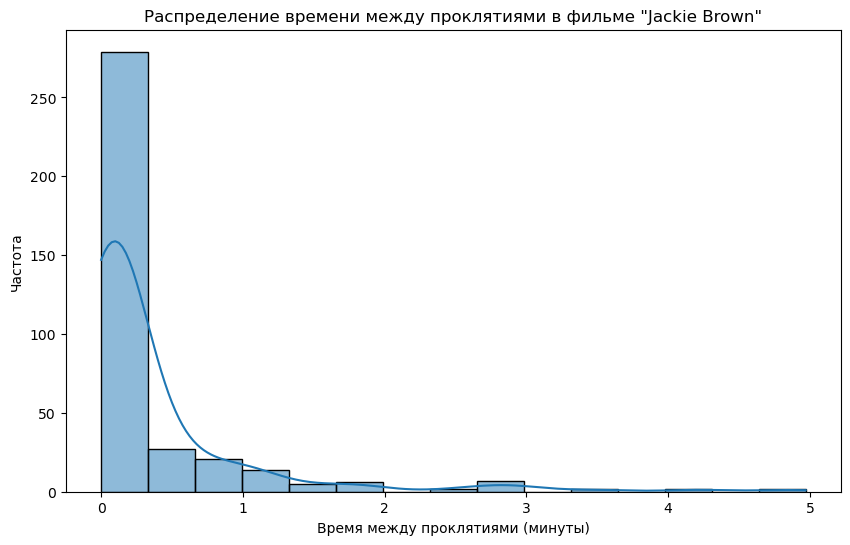

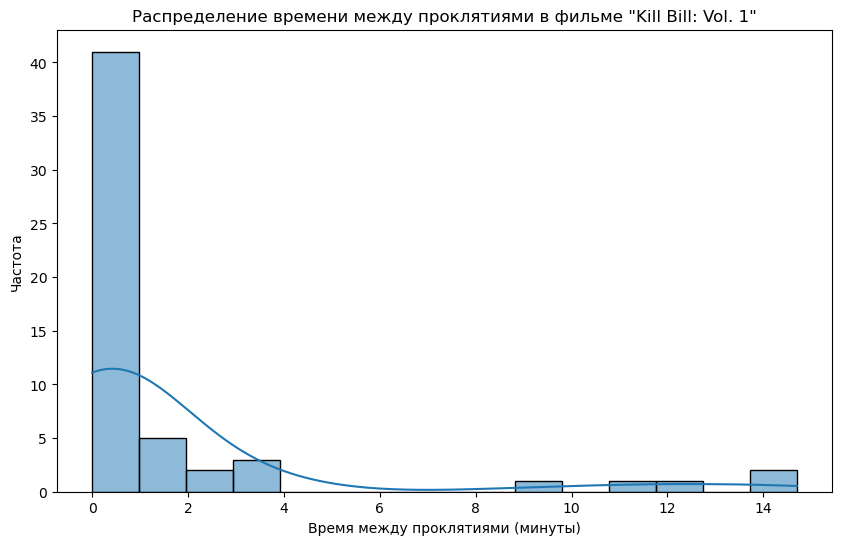

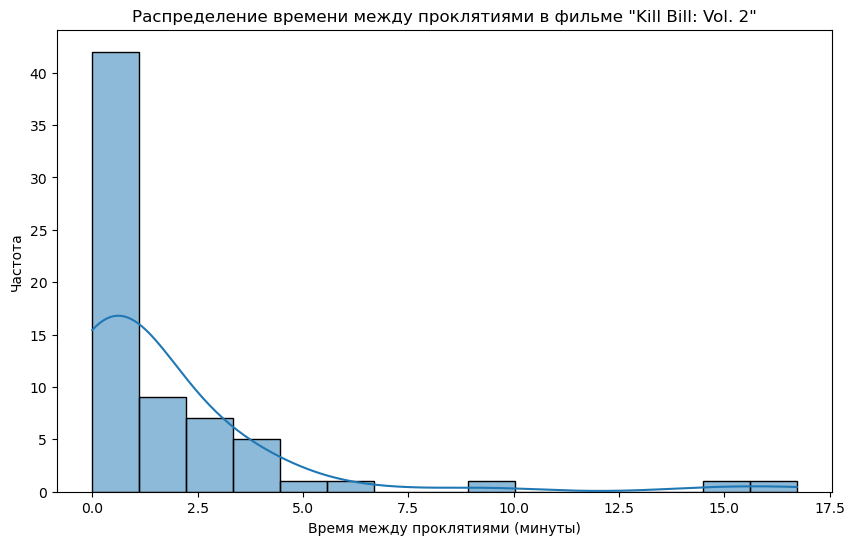

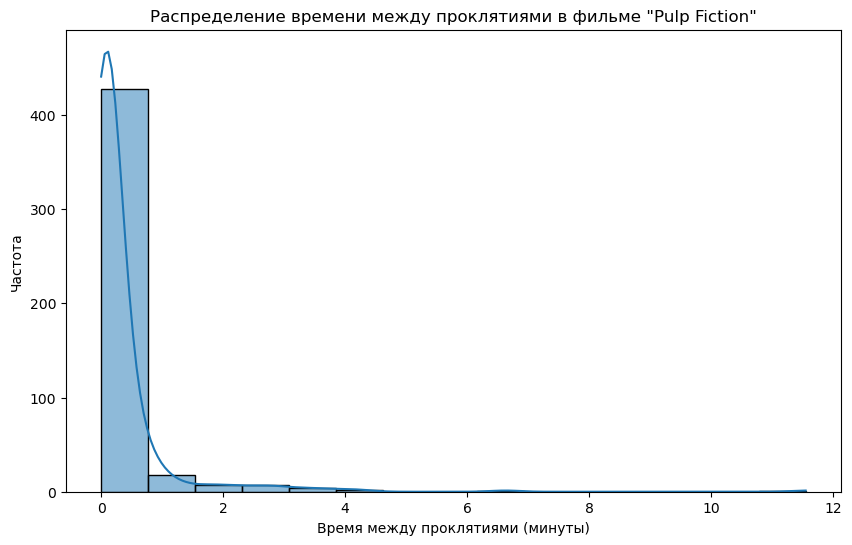

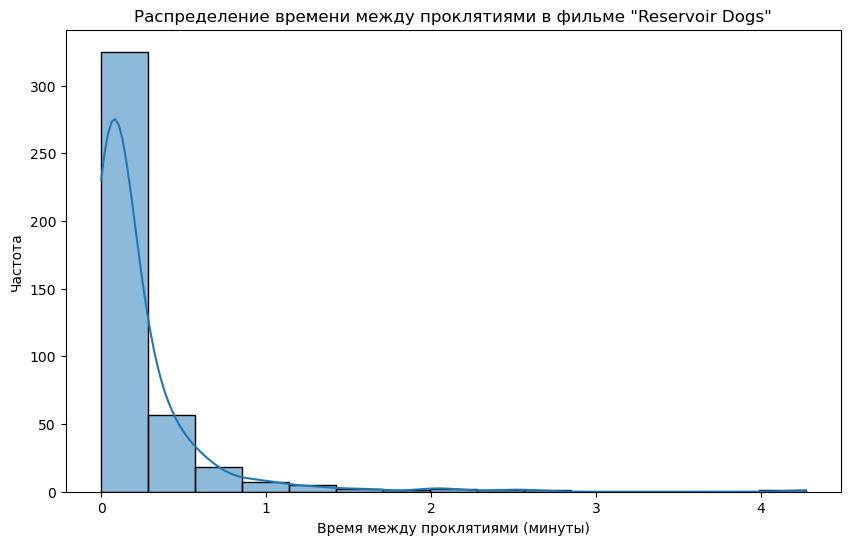

In [519]:
# Получаем список фильмов
movies = curses_sorted['movie'].unique()
# Построим распределение для каждого фильма
for movie in movies:
    movie_curses = curses_sorted[curses_sorted['movie'] == movie]
    movie_time_diffs = movie_curses['time_diff'].dropna()
    
    plt.figure(figsize=(10,6))
    sns.histplot(movie_time_diffs, bins=15, kde=True)
    plt.title(f'Распределение времени между проклятиями в фильме "{movie}"')
    plt.xlabel('Время между проклятиями (минуты)')
    plt.ylabel('Частота')
    plt.show()
    
    

Самое большое количество проклятий зафиксировано в фильме "Pulp Fiction" (469), за ним следуют "Jackie Brown" (368) и "Reservoir Dogs" (421). Наименьшее количество проклятий — в фильмах "Kill Bill: Vol. 1" (57) и "Kill Bill: Vol. 2" (69), что связано, вероятно, с большей ориентированностью на действия, а не диалоги

Максимальное количество летальных исходов наблюдается в "Kill Bill: Vol. 1" (63) и "Inglorious Basterds" (48), что связано с жанром и сюжетами, насыщенными насилием

Минимальное количество смертей — в "Jackie Brown" (4), так как этот фильм меньше сосредоточен на насилии

Наибольшее соотношение проклятий к смертям наблюдается в "Jackie Brown" (92 проклятия на одну смерть) и "Pulp Fiction" (67). Это подчеркивает диалоговую насыщенность фильмов с меньшим акцентом на насилие

Наименьшее соотношение проклятий к смертям отмечается в "Kill Bill: Vol. 1" (0.90), что говорит о том, что в этом фильме акцент сделан на действие, а не на диалоги

Самые популярные слова — "fucking" (407), "shit" (221), и "fuck" (213). Это показывает характерный стиль грубого диалога в фильмах Тарантино

Менее популярны такие слова, как "cunt", "shithead" и "damned", которые используются реже и, возможно, имеют специфический контекст

Среднее время между проклятиями составляет около 0.5 минуты, что свидетельствует о высокой частоте использования проклятий

В фильмах с наибольшим количеством проклятий (например, "Pulp Fiction" и "Reservoir Dogs") минимальное время между проклятиями, тогда как в фильмах с акцентом на действие (например, "Kill Bill") промежутки больше

Для большинства фильмов распределение времени между проклятиями имеет асимметричную форму, где основной объем приходится на промежутки менее 1 минуты, что подчеркивает интенсивность диалогов